predict emotion scores for all lines in the data
for every season, plot distribution of all emotion labels in that season
for each emotion label, plot relative freq of each emotion across all seasons

In [3]:
import os
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt

In [4]:
# load classifier pipeline from HuggingFace
classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      return_all_scores=False) # return only the most likely score

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/home/ucloud/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [5]:
# navigating into the input folder and reading the dataset as a pandas dataframe
filename = os.path.join("../input/Game_of_Thrones_Script.csv")
data = pd.read_csv(filename)

In [6]:
print(data)

      Release Date    Season    Episode     Episode Title              Name  \
0       2011-04-17  Season 1  Episode 1  Winter is Coming      waymar royce   
1       2011-04-17  Season 1  Episode 1  Winter is Coming              will   
2       2011-04-17  Season 1  Episode 1  Winter is Coming      waymar royce   
3       2011-04-17  Season 1  Episode 1  Winter is Coming              will   
4       2011-04-17  Season 1  Episode 1  Winter is Coming             gared   
...            ...       ...        ...               ...               ...   
23906   2019-05-19  Season 8  Episode 6   The Iron Throne           brienne   
23907   2019-05-19  Season 8  Episode 6   The Iron Throne             bronn   
23908   2019-05-19  Season 8  Episode 6   The Iron Throne  tyrion lannister   
23909   2019-05-19  Season 8  Episode 6   The Iron Throne               man   
23910   2019-05-19  Season 8  Episode 6   The Iron Throne               all   

                                                Sen

In [9]:
#print(data["Sentence"][0])

0        What do you expect? They're savages. One lot s...
1        I've never seen wildlings do a thing like this...
2                                   How close did you get?
3                                  Close as any man would.
4                         We should head back to the wall.
                               ...                        
23906    I think we can all agree that ships take prece...
23907        I think that's a very presumptuous statement.
23908    I once brought a jackass and a honeycomb into ...
23909                              The Queen in the North!
23910    The Queen in the North! The Queen in the North...
Name: Sentence, Length: 23911, dtype: object


In [61]:
#classifier(data["Sentence"][0])

[{'label': 'disgust', 'score': 0.8400837182998657}]

In [8]:
scores = []
for row in data["Sentence"][0:10]:
    result = classifier(row)
    scores.append(result)

In [9]:
len(scores)

10

In [10]:
#print(scores[0])
print(scores[0]["label"])

TypeError: list indices must be integers or slices, not str

In [11]:
dftest = data[0:10]
# Using DataFrame.insert() to add a column
df.insert(2, "Emotion label", scores, True)

NameError: name 'df' is not defined

In [73]:
data.Season.value_counts()

Season
Season 2    3914
Season 3    3573
Season 4    3446
Season 1    3179
Season 5    3035
Season 6    2856
Season 7    2442
Season 8    1466
Name: count, dtype: int64

In [5]:
s1

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.
...,...,...,...,...,...,...
3174,2011-06-19,Season 1,Episode 10,Fire and Blood,daenerys targaryen,ls that what you fear? You will be my khalasar...
3175,2011-06-19,Season 1,Episode 10,Fire and Blood,daenerys targaryen,"Ser Jorah, bind this woman to the pyre. You sw..."
3176,2011-06-19,Season 1,Episode 10,Fire and Blood,mirri maz duur,You will not hear me scream.
3177,2011-06-19,Season 1,Episode 10,Fire and Blood,daenerys targaryen,I will. But it is not your screams I want. Onl...


below here can be used generally for the whole dataset! remove slic and s1 -> data
maybe do these steps once per season?

In [8]:
i = 1
scores = []
for row in data:
    result = classifier(row)
    scores.append(result)
    print("finished row " + str(i))
    i += 1

In [9]:
len(scores)

3179

In [12]:
print(scores)

[[{'label': 'disgust', 'score': 0.8400837182998657}], [{'label': 'disgust', 'score': 0.6117002367973328}], [{'label': 'surprise', 'score': 0.7143816947937012}], [{'label': 'neutral', 'score': 0.9114254713058472}], [{'label': 'fear', 'score': 0.42081132531166077}], [{'label': 'fear', 'score': 0.9559083580970764}], [{'label': 'neutral', 'score': 0.6202900409698486}], [{'label': 'surprise', 'score': 0.7657095193862915}], [{'label': 'anger', 'score': 0.5590818524360657}], [{'label': 'anger', 'score': 0.6356110572814941}]]


In [13]:
# removing the scores from the list 'scores' and leaving only the label names
row = 0 # create a row counter to use for the slice
emotions = [] # create list for emotion labels to go in

for emotion in scores:
    emotion = scores[row][0]["label"] #remove everything but the emotion label using slice
    emotions.append(emotion) # add to list
    row += 1 # go to next row
print(emotions)

['disgust', 'disgust', 'surprise', 'neutral', 'fear', 'fear', 'neutral', 'surprise', 'anger', 'anger']


In [12]:
# not needed
# create a counter for each emotion label
anger_count = 0
disgust_count = 0
fear_count = 0
joy_count = 0
neutral_count = 0
sadness_count = 0
surprise_count = 0

for emotion in s1emotions: #add 1 to the counter which corresponds to the emotion
    if emotion == "anger":
        anger_count += 1
    elif emotion == "disgust":
        disgust_count += 1
    elif emotion == "fear":
        fear_count += 1
    elif emotion == "joy":
        joy_count += 1
    elif emotion == "neutral":
        neutral_count += 1
    elif emotion == "sadness":
        sadness_count += 1
    elif emotion == "surprise":
        surprise_count += 1

In [15]:
# Using DataFrame.insert() to add a column
new_df = data[0:10] # clone the dataframe before adding to it
new_df.insert(6, #insert as the 6th column
              "Emotion_label", #column name
              emotions, # data to insert
              True) # allow duplicates

In [17]:
new_df

,Release Date,Season,Episode,Episode Title,Name,Sentence,Emotion_label
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,disgust
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,disgust
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,surprise
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,neutral
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,fear
5,2011-04-17,Season 1,Episode 1,Winter is Coming,royce,Do the dead frighten you?,fear
6,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,Our orders were to track the wildlings. We tra...,neutral
7,2011-04-17,Season 1,Episode 1,Winter is Coming,royce,You don't think he'll ask us how they died? Ge...,surprise
8,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Whatever did it to them could do it to us. The...,anger
9,2011-04-17,Season 1,Episode 1,Winter is Coming,royce,It's a good thing we're not children. You want...,anger


In [25]:
season_label

'Season 1'

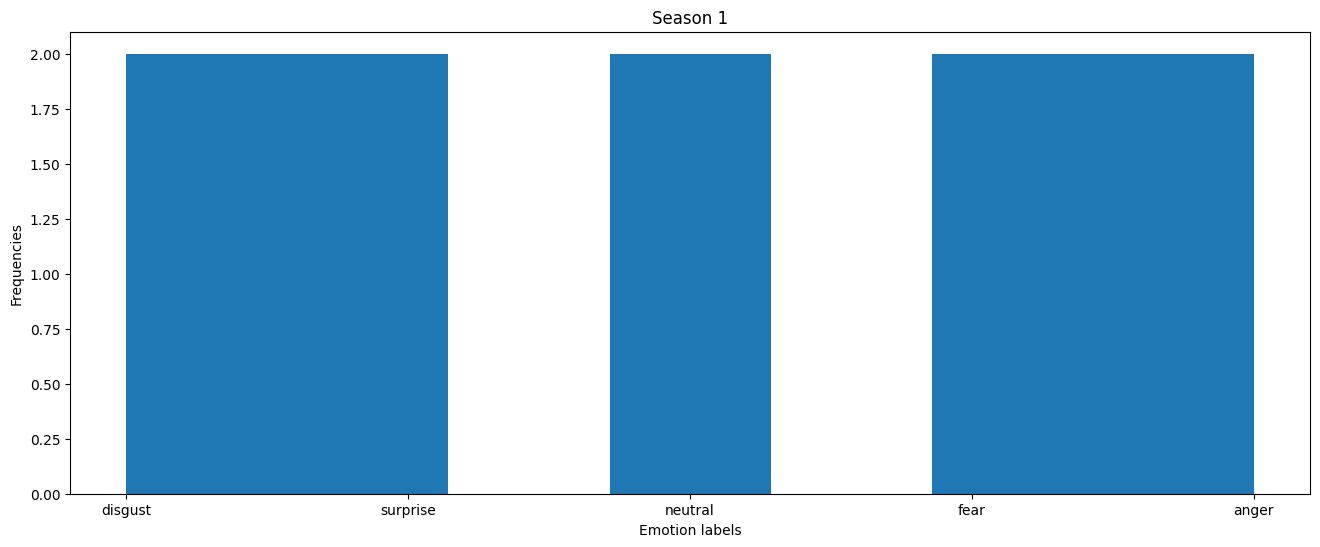

<Figure size 640x480 with 0 Axes>

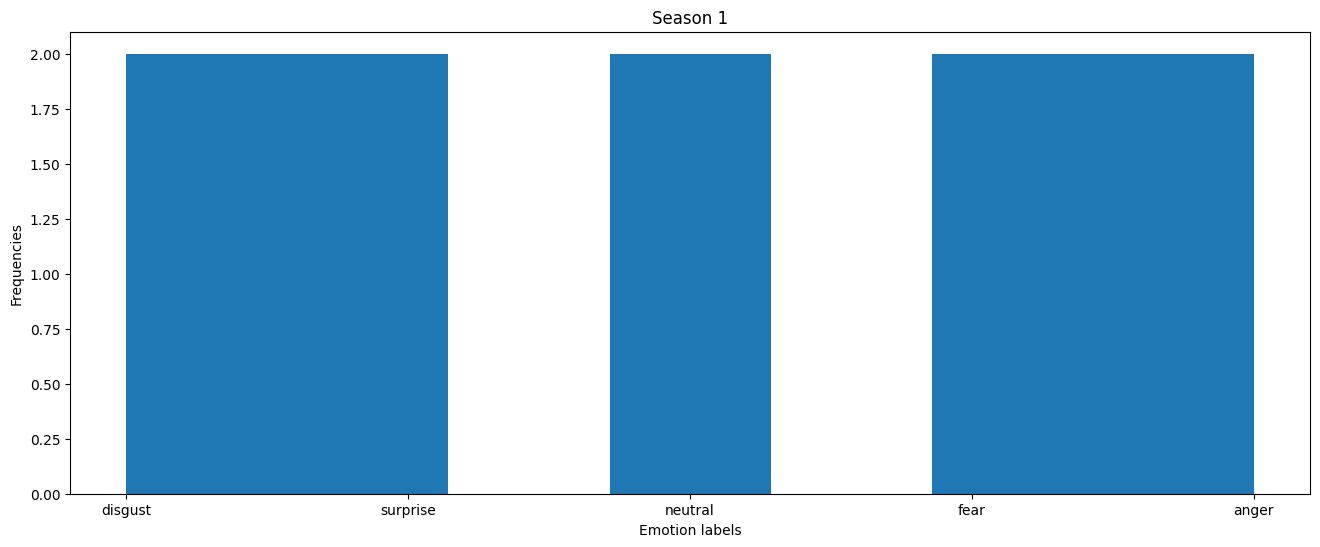

<Figure size 640x480 with 0 Axes>

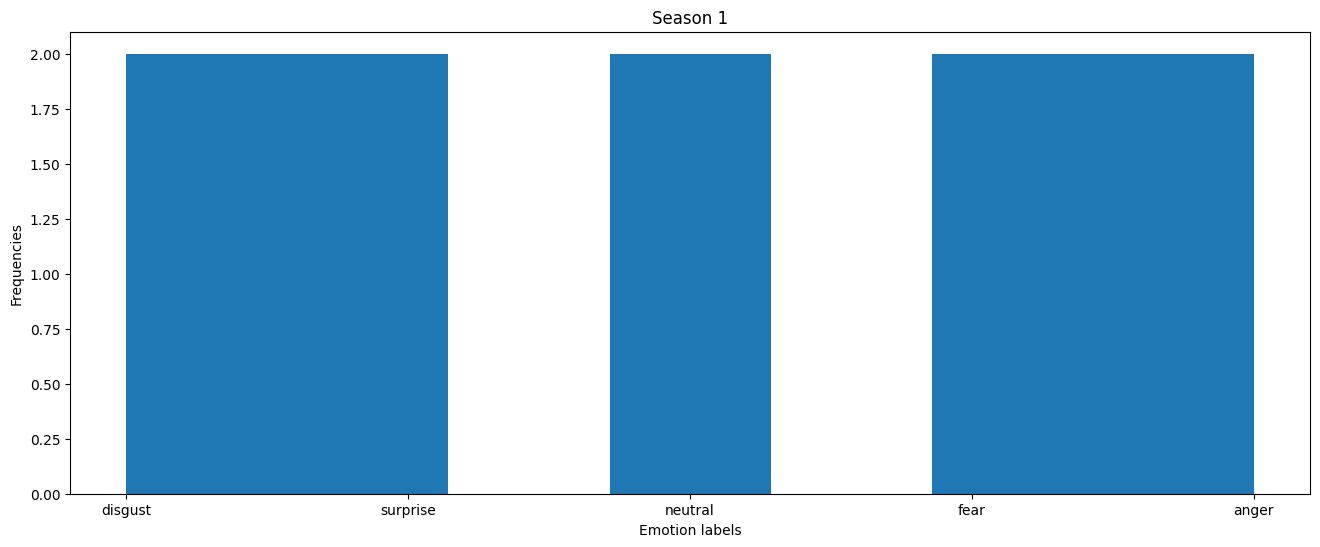

<Figure size 640x480 with 0 Axes>

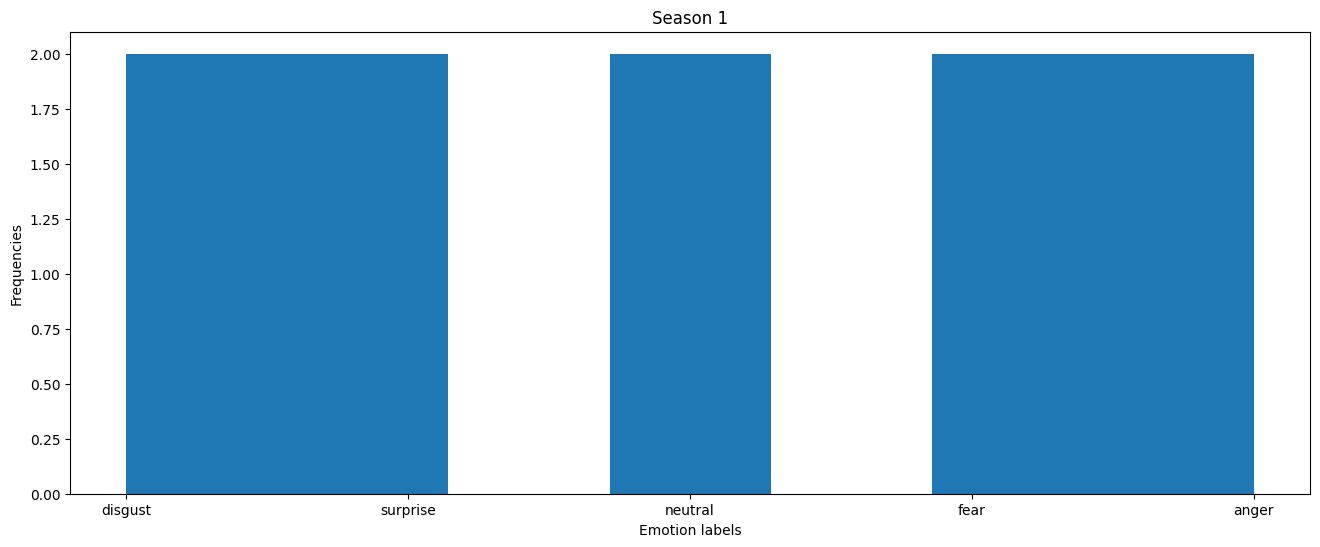

<Figure size 640x480 with 0 Axes>

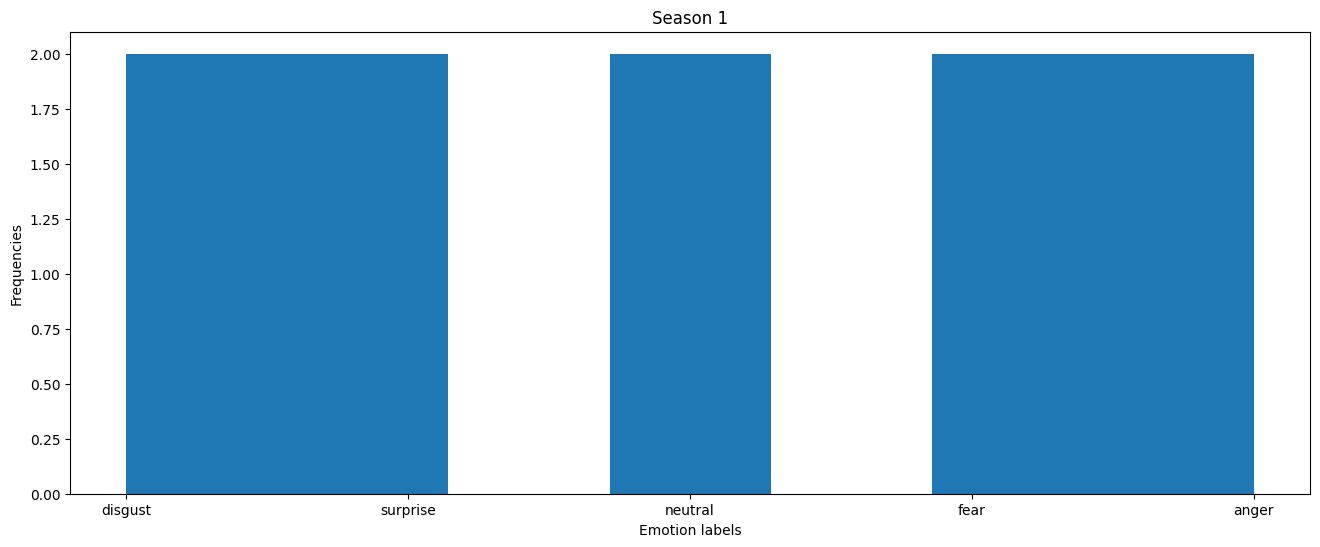

<Figure size 640x480 with 0 Axes>

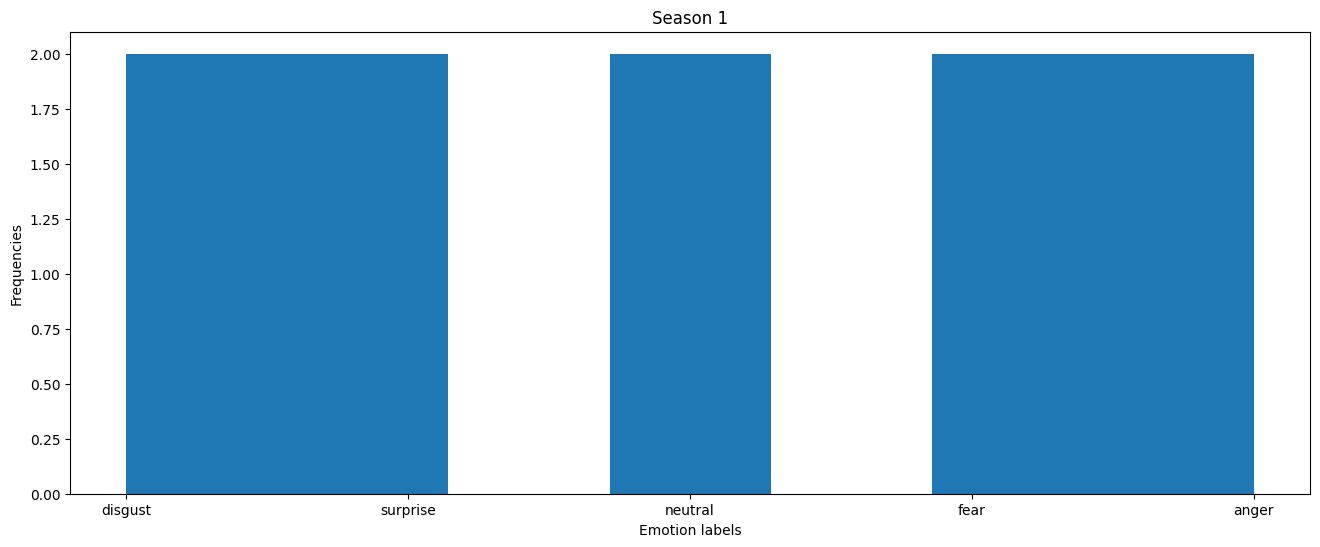

<Figure size 640x480 with 0 Axes>

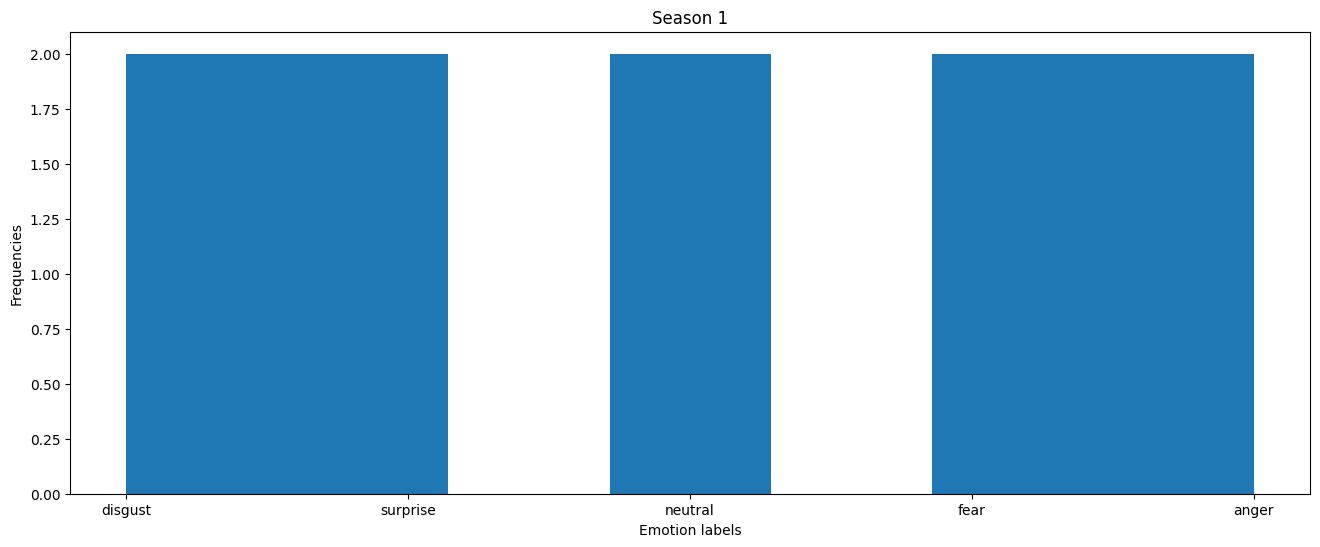

<Figure size 640x480 with 0 Axes>

In [40]:
# create a plot for the distribution of emotion labels for every season
counter = 1 # create a counter to update the season labels
season_list = []
season_length = []
for seasons in new_df:
    season_label = "Season " + str(counter) # create a label for every season
    season_list.append(season_label)
    season_df = new_df[new_df['Season'] == season_label] #split dataframe based on seasons
    length = len(season_df)
    season_length.append(length) # save the total amount of lines for each season, is used later to plot relative frequencies
    
    plt.figure(figsize = (16,6))
    plt.hist(season_df["Emotion_label"], bins = 7) # plot histogram
    plt.title(season_label)
    plt.xlabel('Emotion labels')
    plt.ylabel('Frequencies')

    plt.savefig('../output/' + season_label + '.png') # save output
    plt.show()
    plt.clf()
    
    #counter += 1

In [2]:
#emotion_labels = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]
#print(emotion_labels[1])

disgust


In [29]:
len(emotion_df)

2

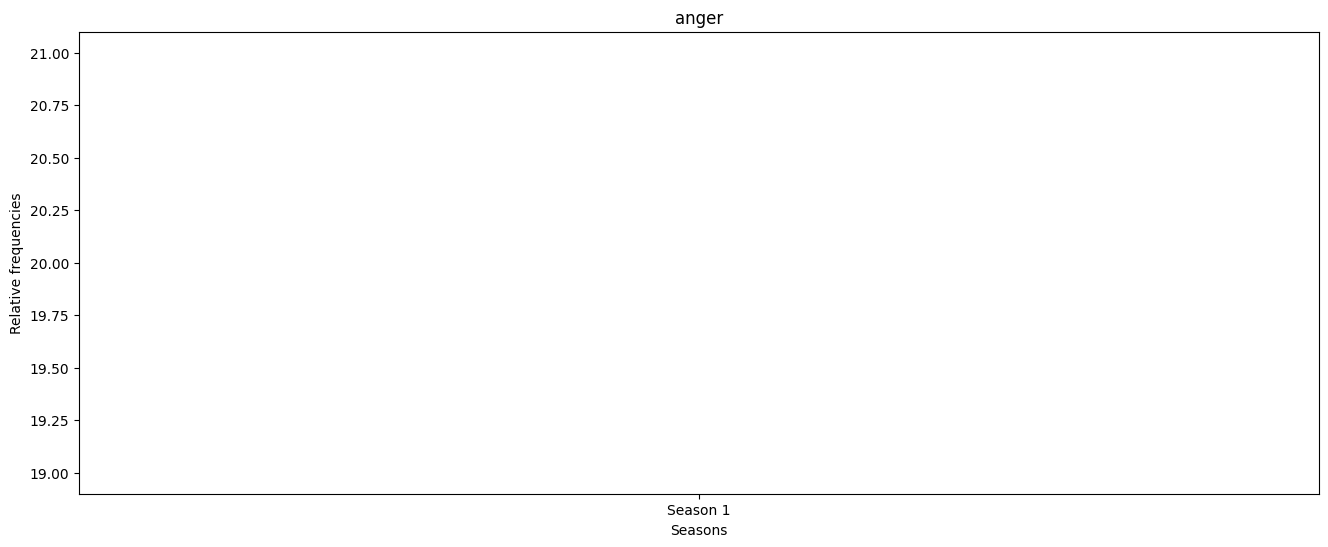

<Figure size 640x480 with 0 Axes>

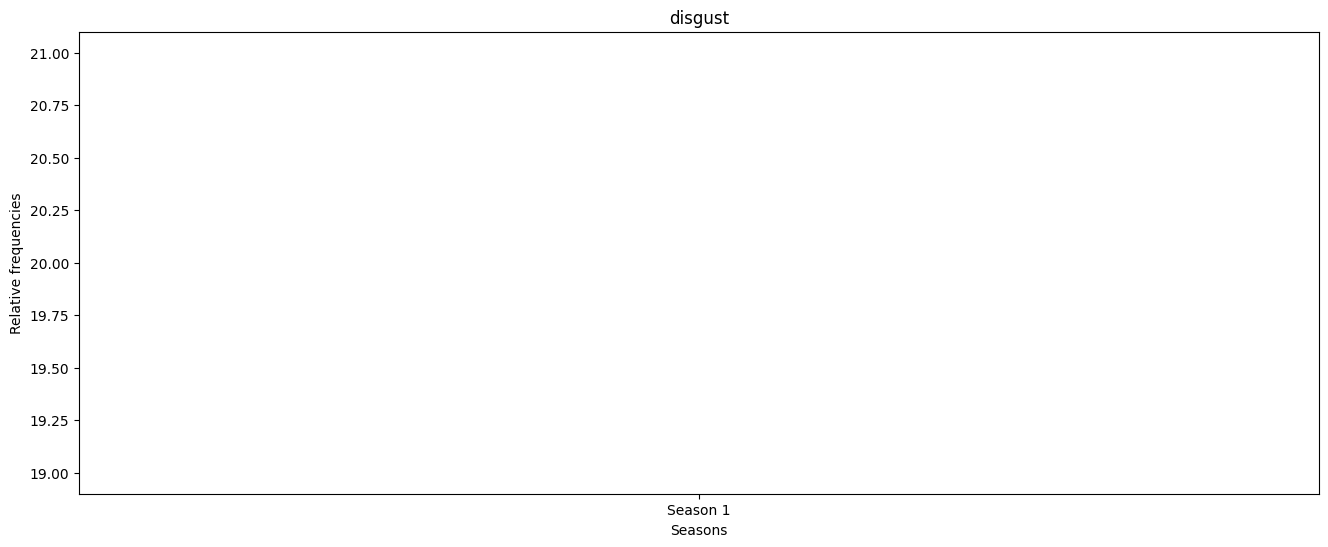

<Figure size 640x480 with 0 Axes>

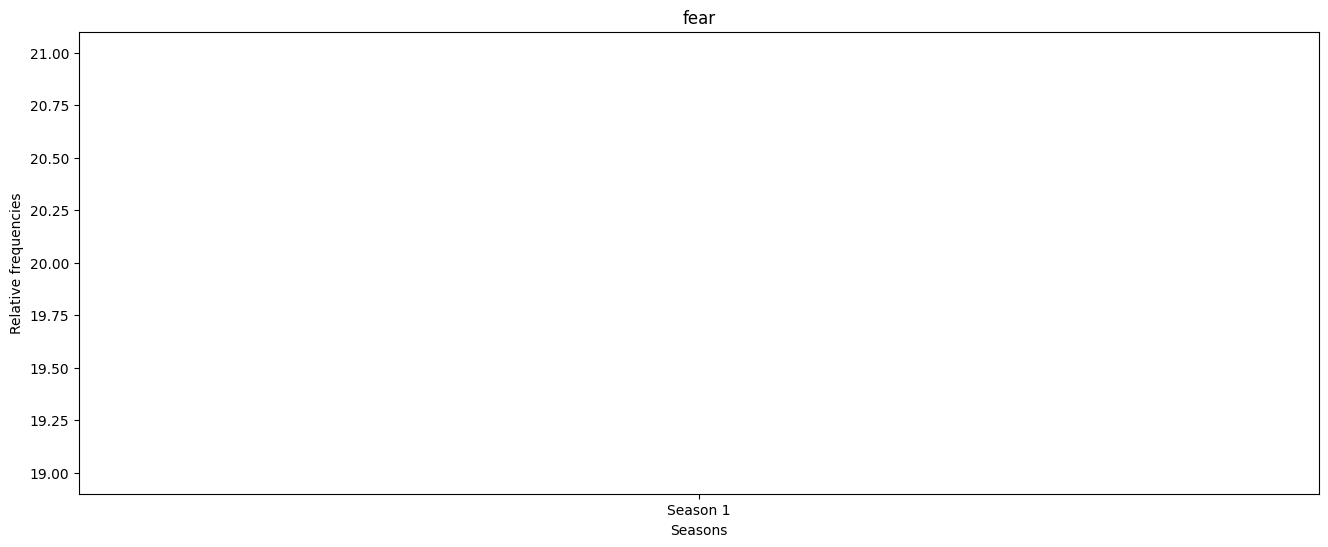

<Figure size 640x480 with 0 Axes>

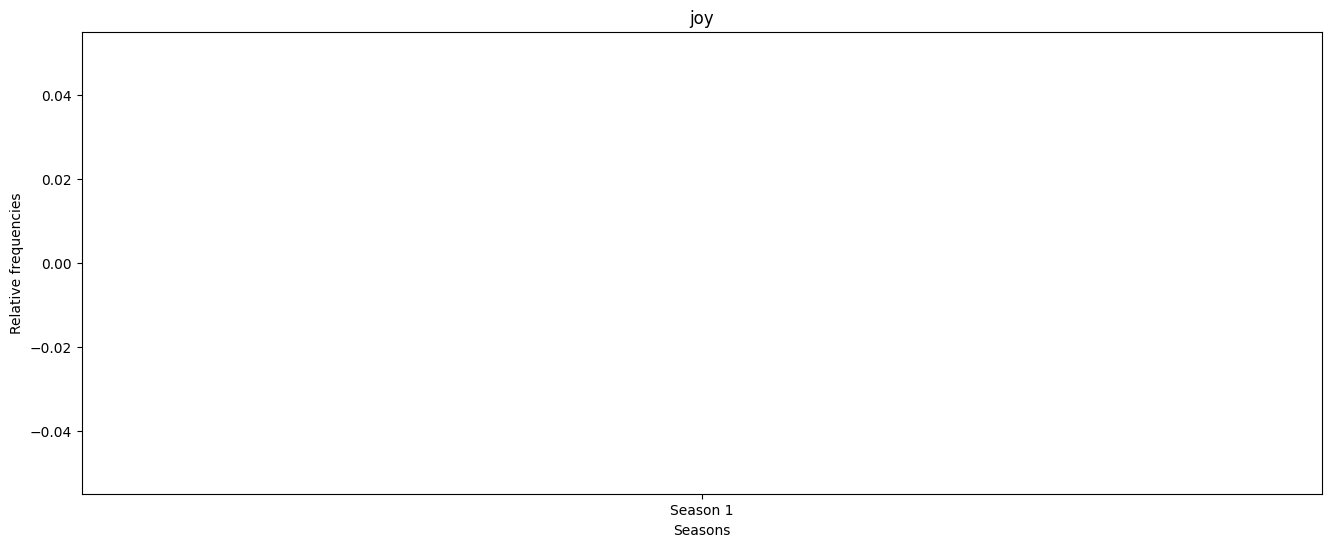

<Figure size 640x480 with 0 Axes>

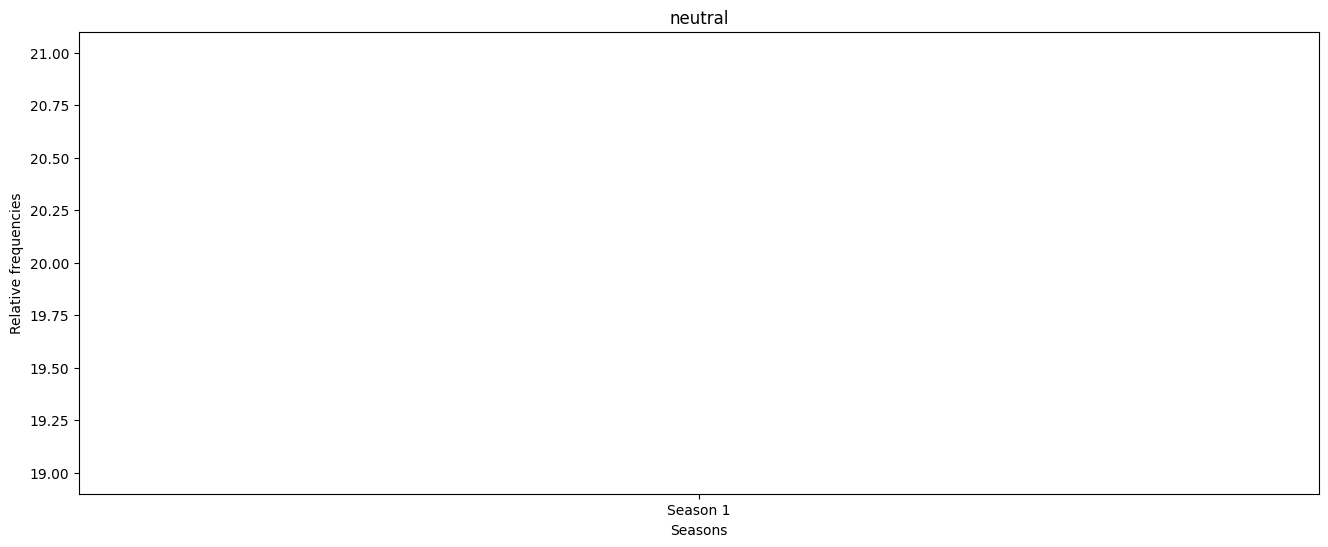

<Figure size 640x480 with 0 Axes>

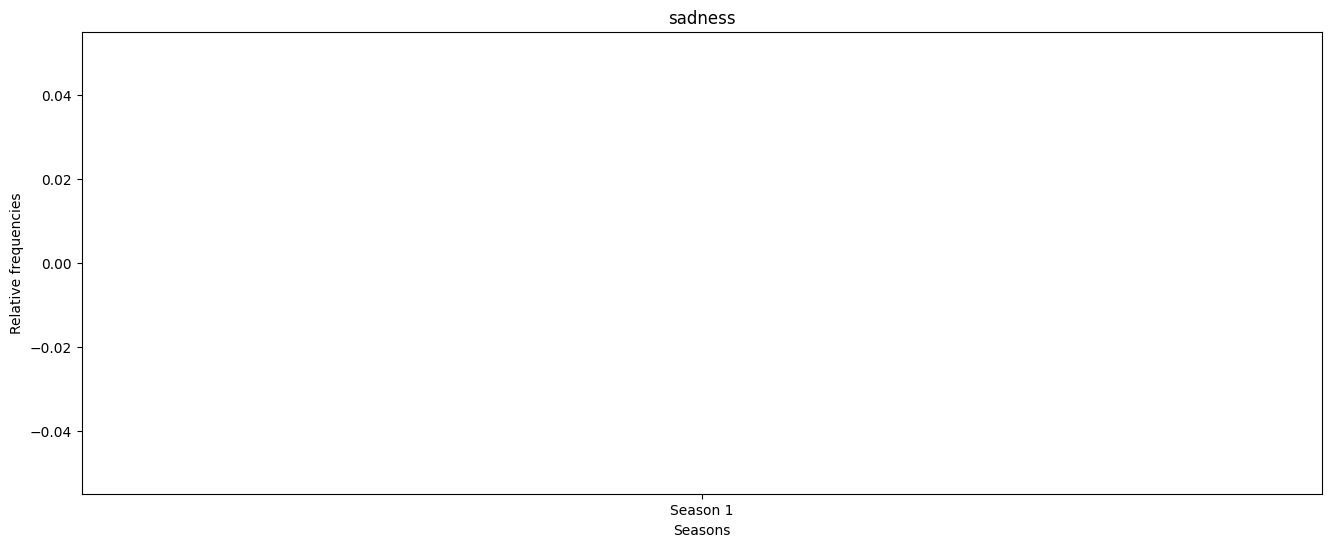

<Figure size 640x480 with 0 Axes>

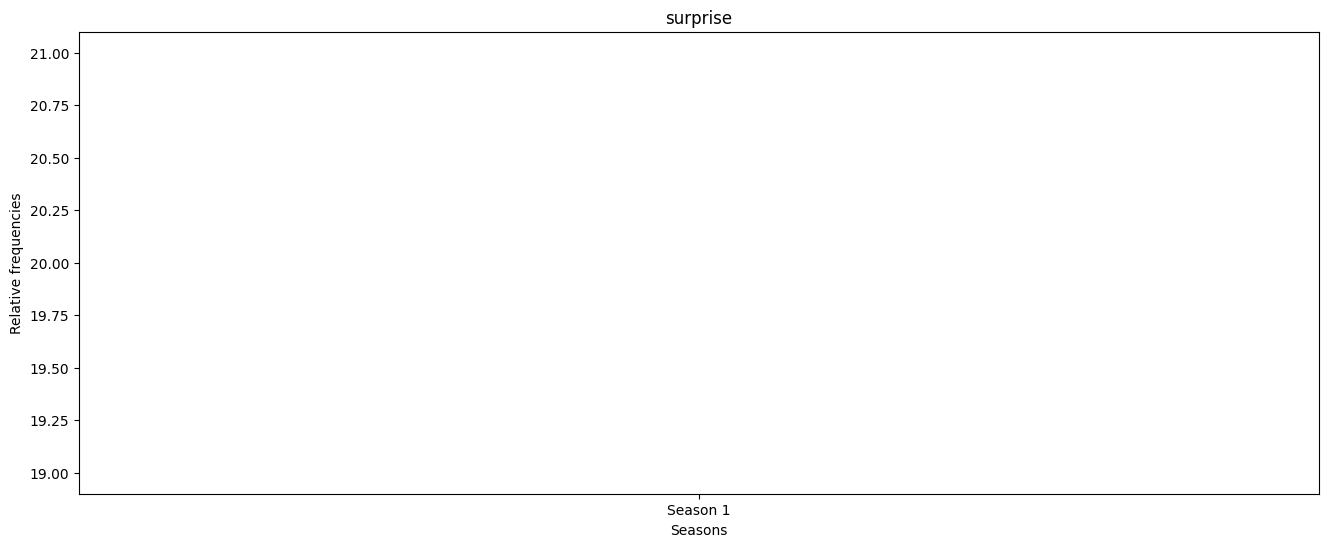

<Figure size 640x480 with 0 Axes>

In [59]:
# create a plot for the relative frequency of every emotion label across seasons
emotion_list = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]
emotion_counter = 0
season_counter = 1
for emotions in new_df:
    rel_freq_list = [] # save relative frequencies per emotion
    emotion_label = emotion_list[emotion_counter] # create a label for every emotion
    emotion_df = new_df[new_df['Emotion_label'] == emotion_label] #split dataframe based on seasons
    for season in season_list:
        rel_freq = len(emotion_df)/season_length[season_counter]*100 # calculate relative frequency
        rel_freq_list.append(rel_freq)
    
    plt.figure(figsize = (16,6))
    plt.plot(season_list, rel_freq_list) # plot
    plt.title(emotion_label)
    plt.xlabel('Seasons')
    plt.ylabel('Relative frequencies')

    plt.savefig('../output/' + emotion_label + '.png') # save output
    plt.show()
    plt.clf()
    
    emotion_counter += 1
    season_counter += 1

In [16]:
# not needed
emotion_freq = []
emotion_freq.append(anger_count)
emotion_freq.append(disgust_count)
emotion_freq.append(fear_count)
emotion_freq.append(joy_count)
emotion_freq.append(neutral_count)
emotion_freq.append(sadness_count)
emotion_freq.append(surprise_count)
print(emotion_freq)

[534, 360, 136, 133, 1422, 204, 390]


In [17]:
#not needed
emotions = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]

Text(0, 0.5, 'Frequencies')

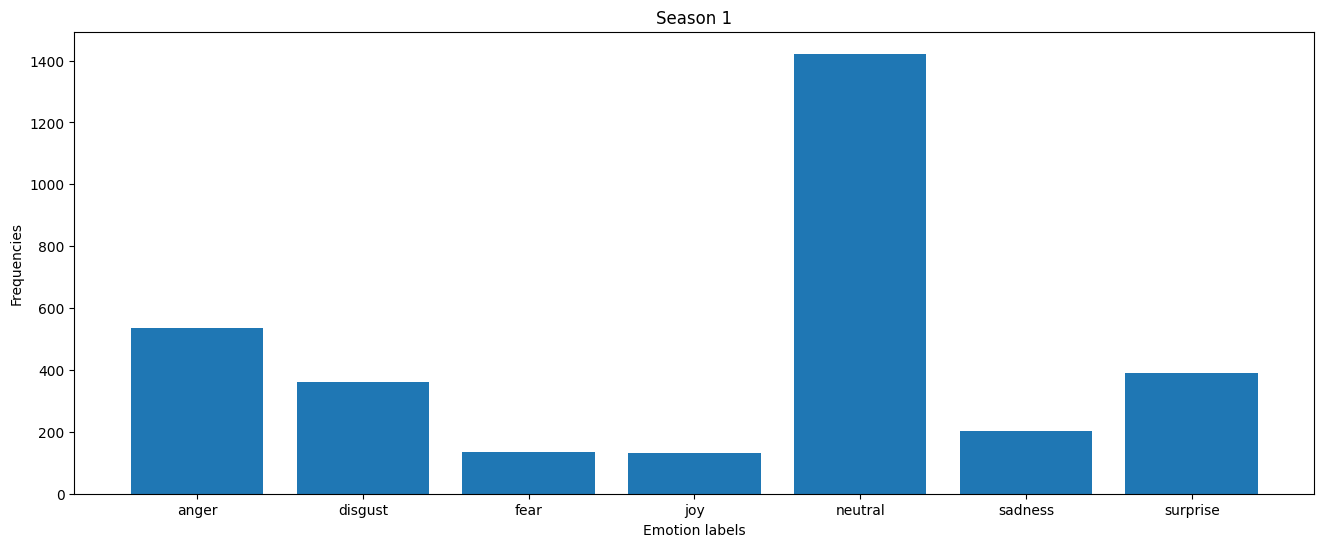

In [18]:
# not needed
plt.figure(figsize = (16,6))
plt.bar(emotions, emotion_freq)
plt.title('Season 1')
plt.xlabel('Emotion labels')
plt.ylabel('Frequencies')